In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
A = pd.read_excel('./Data/가공완료/[따릉이]연도별시각화자료.xlsx', index_col='Unnamed: 0')
B = pd.read_excel('./Data/가공완료/[따릉이]월별대여건수(2015~).xlsx', index_col='Unnamed: 0')
C = pd.read_excel('./Data/가공완료/[따릉이_확진]일자별증감.xlsx', index_col='Unnamed: 0')
D = pd.read_excel('./Data/가공완료/[코로나]월별_확진자수.xlsx', index_col='월')

In [3]:
DF_18 = pd.read_excel('./Data/2018따릉이(월별이동시간거리).xlsx')
DF_19 = pd.read_excel('./Data/2019따릉이(월별이동시간거리).xlsx')
DF_20 = pd.read_excel('./Data/2020따릉이(월별이동시간거리).xlsx')
DF_21 = pd.read_excel('./Data/2021따릉이(월별이동시간거리).xlsx')

# ===================================
# @@@@@데이터별 수정작업@@@@@

In [15]:
A_DF = A.copy()
B_DF = B.copy()
C_DF = C.copy()
D_DF = D.copy()
DF_18_1 = DF_18.copy() # 월별 평균 이동시간거리
DF_19_1 = DF_19.copy() # 월별 평균 이동시간거리
DF_20_1 = DF_20.copy() # 월별 평균 이동시간거리
DF_21_1 = DF_21.copy() # 월별 평균 이동시간거리

In [16]:
A_DF['월'] = ['01','02','03','04','05','06','07','08','09','10','11','12']
A_DF = A_DF.set_index('월')

In [17]:
B_DF_AF = B_DF[-24:].set_index('월')

In [18]:
D_DF = D_DF[:-2] # 월별확진자수 (2020-2021)
D_DF_BF = D_DF[:12] # 월별확진자수 (2020)
D_DF_AF = D_DF[12:] # 월별확진자수 (2021)

In [19]:
DF_18_2 = DF_18_1.groupby('월')[['이동거리']].median()
DF_19_2 = DF_19_1.groupby('월')[['이동거리']].median()
DF_18_2 = DF_18_2.reset_index()
DF_19_2 = DF_19_2.reset_index()

DF_20_2 = DF_20_1.groupby('월')[['이동거리']].median()
DF_21_2 = DF_21_1.groupby('월')[['이동거리']].median()
DF_20_2 = DF_20_2.reset_index()
DF_21_2 = DF_21_2.reset_index()

In [20]:
DATA_BF = DF_18_2.append(DF_19_2, ignore_index=True)
DATA_BF = DATA_BF.set_index('월')
DATA_BF

,이동거리
월,
2018-01,3170.646120
2018-02,3447.652954
2018-03,4563.791554
2018-04,5162.697875
2018-05,5446.438344
2018-06,5497.581007
2018-07,5168.748023
2018-08,4996.684956
2018-09,5643.070462


In [21]:
DATA = DF_20_2.append(DF_21_2, ignore_index=True)
DATA = DATA.set_index('월')
DATA_1 = DATA[:12]
DATA_2 = DATA[12:]
DATA_2

,이동거리
월,
2021-01,2702.776479
2021-02,3071.907882
2021-03,4657.599303
2021-04,3357.945282
2021-05,3382.821900
2021-06,7545.320899
2021-07,3136.044659
2021-08,3159.996711
2021-09,2891.311835


In [22]:
COR = pd.merge(DATA, D_DF, how='left', on='월')
COR # 이동거리 + 확진자

,이동거리,확진자
월,,
2020-01,4523.796668,0
2020-02,4825.902353,0
2020-03,6733.142302,0
2020-04,5952.447186,7
2020-05,3870.881290,228
2020-06,9780.351784,451
2020-07,2944.518821,288
2020-08,725.609916,2267
2020-09,983.861150,1424


In [23]:
CORR = pd.merge(COR, B_DF_AF, how='left', on='월')
CORR # 이동거리 + 확진자 + 대여건수

,이동거리,확진자,대여건수
월,,,
2020-01,4523.796668,0,794162
2020-02,4825.902353,0,762274
2020-03,6733.142302,0,1533535
2020-04,5952.447186,7,2157390
2020-05,3870.881290,228,2480330
2020-06,9780.351784,451,2770858
2020-07,2944.518821,288,2582511
2020-08,725.609916,2267,1733973
2020-09,983.861150,1424,2811990


# @@@@@ 수정작업 끝 @@@@@
# ===================================

# 연도x월별 이용패턴
- 2016.01-2021.12의 공공자전거이용내역데이터 사용
- 각 연도x월별로 이용건수의 총합에서 증감수로 변환(각 전년도 동월 이용건수를 뺌)
- matplotlib 이용하여 각 연도x월별 따릉이 이용패턴을 시각화해 보고자함

In [14]:
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
rc('font', family = 'malgun gothic')

## 그래프 1
- 연도별 이용건수

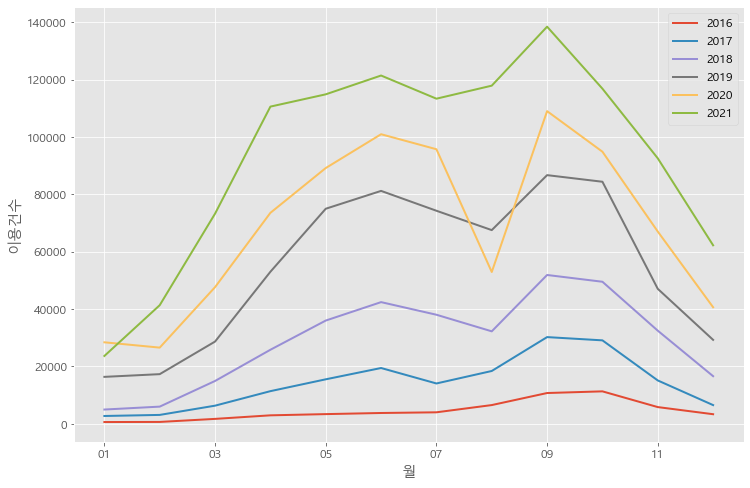

In [14]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2

A_DF.plot()
plt.xlabel('월')
plt.ylabel('이용건수')
plt.legend()
plt.show()

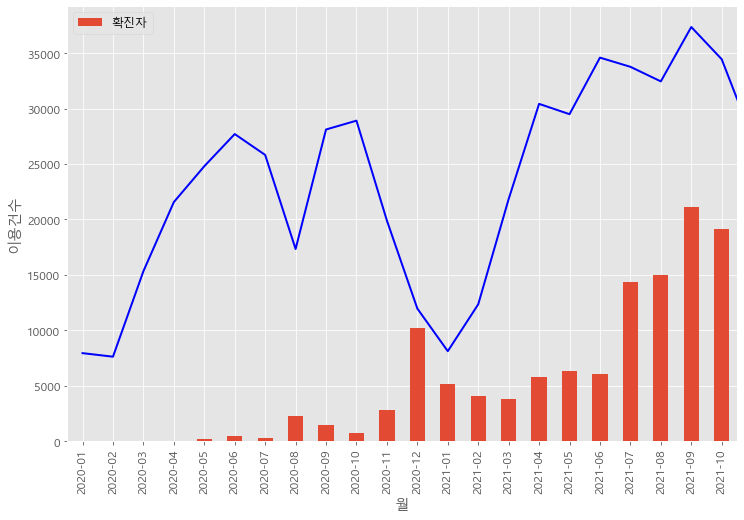

In [16]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2

D_DF[:-2].plot.bar()
plt.plot((B_DF_AF/100), c = 'b')

plt.xlabel('월')
plt.ylabel('이용건수')
plt.legend()
plt.show()

# 그래프 2
- 연도별 이동거리

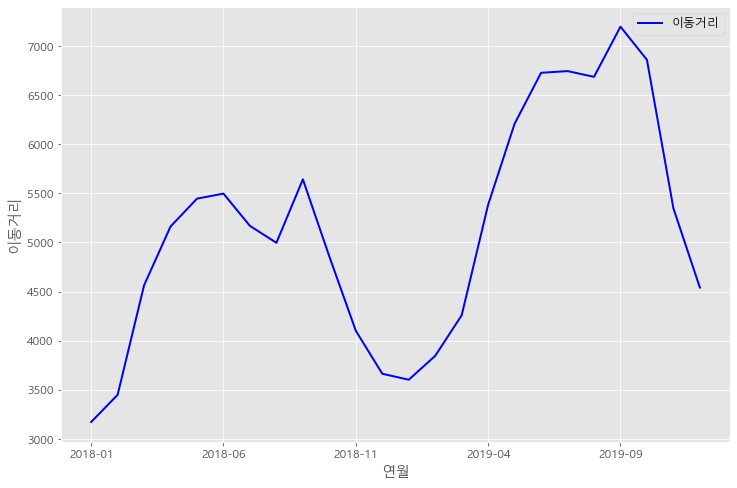

In [18]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2

DATA_BF.plot(c='b') # 2018~2019 이동거리

plt.xlabel('연월')
plt.ylabel('이동거리')
plt.legend()
plt.show()

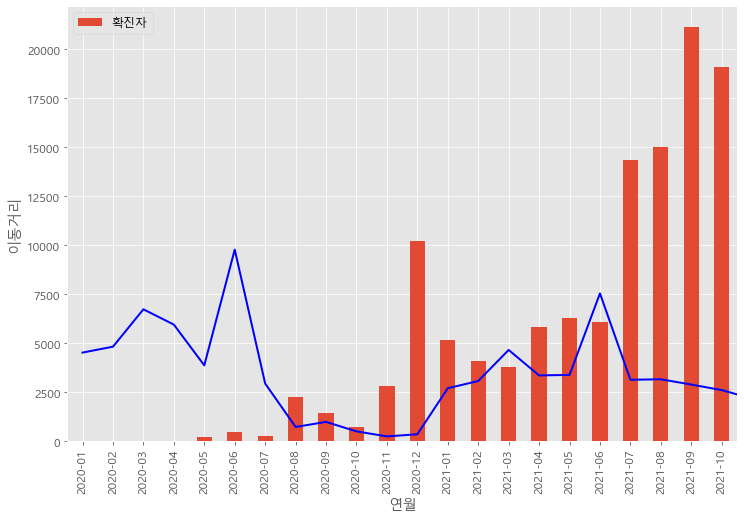

In [59]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2

D_DF[:-2].plot.bar()
plt.plot(DATA, c='b') # 2020~2021 이동거리

plt.xlabel('연월')
plt.ylabel('이동거리')
plt.legend()
plt.show()

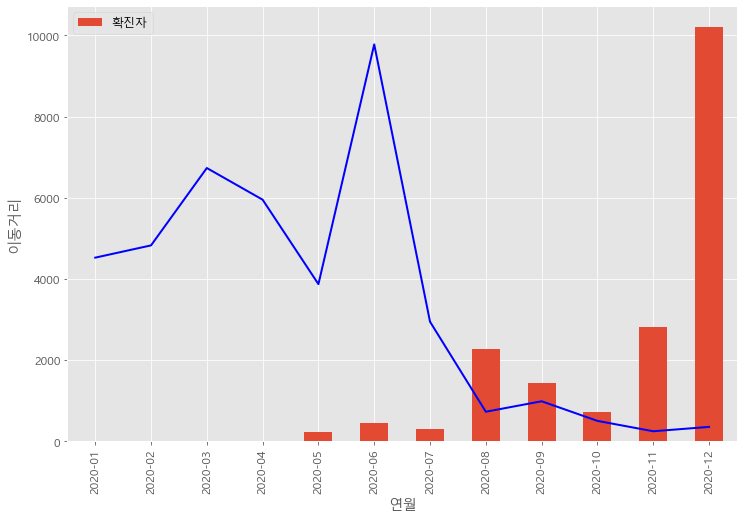

In [20]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2

D_DF[:12].plot.bar()
plt.plot(DATA_1, c='b') # 2020 이동거리

plt.xlabel('연월')
plt.ylabel('이동거리')
plt.legend()
plt.show()

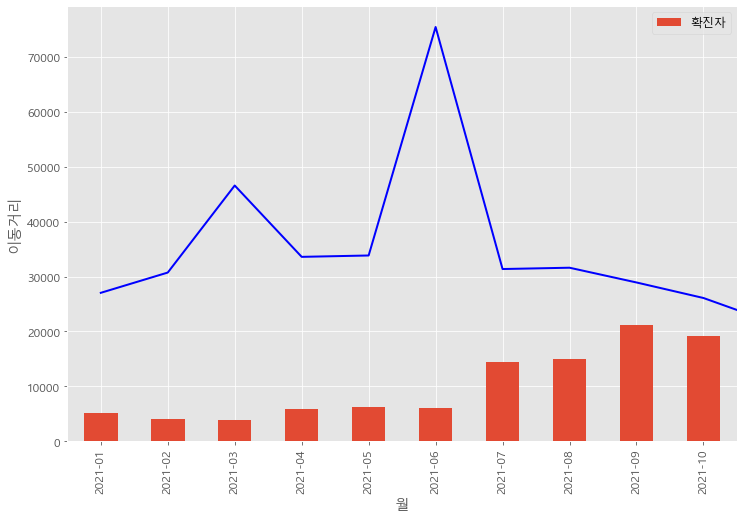

In [21]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2

D_DF[12:-2].plot.bar()
plt.plot((DATA_2*10), c='b') # 2021 이동거리

plt.xlabel('월')
plt.ylabel('이동거리')
plt.legend()
plt.show()

In [22]:
print(len(D_DF[12:-2]))
print(len(DATA[12:]))

10
12


# 상관관계분석
- 이동거리 + 확진자

In [23]:
COR[:12].corr()

,이동거리,확진자
이동거리,1.00000,-0.51116
확진자,-0.51116,1.00000


In [24]:
COR[12:].corr()

,이동거리,확진자
이동거리,1.000000,-0.500337
확진자,-0.500337,1.000000


- +대여건수

In [25]:
CORR[:12].corr()

,이동거리,확진자,대여건수
이동거리,1.000000,-0.511160,-0.028253
확진자,-0.511160,1.000000,-0.242813
대여건수,-0.028253,-0.242813,1.000000


In [26]:
CORR[12:].corr()

,이동거리,확진자,대여건수
이동거리,1.000000,-0.500337,0.269234
확진자,-0.500337,1.000000,-0.050314
대여건수,0.269234,-0.050314,1.000000


# @@@@@ 모델링전처리 @@@@@

In [230]:
CORR_1 = CORR - CORR.shift()
TRANS_1 = CORR_1[3:]
TRANS_1

,이동거리,확진자,대여건수
월,,,
2020-04,-780.695116,7.0,623855.0
2020-05,-2081.565895,221.0,322940.0
2020-06,5909.470493,223.0,290528.0
2020-07,-6835.832963,-163.0,-188347.0
2020-08,-2218.908905,1979.0,-848538.0
2020-09,258.251235,-843.0,1078017.0
2020-10,-483.456544,-705.0,79628.0
2020-11,-255.977358,2083.0,-901548.0
2020-12,107.654810,7407.0,-793761.0


In [28]:
TRANS = TRANS_1.copy()
for i in tqdm(range(len(TRANS))):
    if TRANS['이동거리'][i] < 0:
        TRANS['이동거리'][i] = 0
    else:
        TRANS['이동거리'][i] = 1

    if TRANS['확진자'][i] < 0:
        TRANS['확진자'][i] = 0
    else:
        TRANS['확진자'][i] = 1
        
    if TRANS['대여건수'][i] < 0:
        TRANS['대여건수'][i] = 0
    else:
        TRANS['대여건수'][i] = 1

TRANS

100%|████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 3498.45it/s]


,이동거리,확진자,대여건수
월,,,
2020-04,0.0,1.0,1.0
2020-05,0.0,1.0,1.0
2020-06,1.0,1.0,1.0
2020-07,0.0,0.0,0.0
2020-08,0.0,1.0,0.0
2020-09,1.0,0.0,1.0
2020-10,0.0,0.0,1.0
2020-11,0.0,1.0,0.0
2020-12,1.0,1.0,0.0


# 나이브 베이지안

In [271]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [272]:
M_model = MultinomialNB()
M_model

MultinomialNB()

In [279]:
X_train, X_test, Y_train, Y_test = train_test_split(TRANS[['확진자','대여건수']], TRANS['이동거리'], test_size=0.33)

In [280]:
M_model.fit(X_train, Y_train)

MultinomialNB()

In [93]:
from sklearn.metrics import classification_report, confusion_matrix

In [207]:
print(classification_report(Y_test, M_model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.60      0.75      0.67         4
         1.0       0.50      0.33      0.40         3

    accuracy                           0.57         7
   macro avg       0.55      0.54      0.53         7
weighted avg       0.56      0.57      0.55         7



In [208]:
print(confusion_matrix(Y_test, M_model.predict(X_test)))

[[3 1]
 [2 1]]


# 의사결정트리

In [249]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split

In [259]:
# X_train, X_test, Y_train, Y_test = train_test_split(DATA0[['확진자','대여건수']], TRANS['이동거리'], test_size=0.2)

In [253]:
# from collections import Counter
# Counter(Y_train)
# Counter(Y_test)

Counter({0.0: 3, 1.0: 2})

In [260]:
DT = tree.DecisionTreeClassifier()
DT

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [260]:
# DT = DecisionTreeClassifier(criterion = "entropy", max_depth=2)
# DT

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [43]:
DT.fit(TRANS[['확진자','대여건수']], TRANS['이동거리'])

DecisionTreeClassifier()

In [261]:
# DT.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [262]:
# y_pred = DT.predict(X_test)

In [263]:
# from sklearn.metrics import accuracy_score

In [264]:
# accuracy_score(Y_test, y_pred)

0.4

In [267]:
# DT.feature_importances_

# pd.DataFrame({'feature' : X_train.columns,

#               'importance' : DT.feature_importances_})

,feature,importance
0,확진자,0.0
1,대여건수,1.0


In [44]:
DT.predict([[0,1]]) # 확진자가 줄고 대여건수가 늘면 이동거리는 늘어남

array([1.])

In [45]:
DT.predict([[1,0]]) # 확진자가 늘고 대여건수가 줄면 이동거리는 줄어듦

array([0.])

In [46]:
DT.predict([[1,1]]) # 확진자가 늘고 대여건수가 늘면 이동거리는 줄어듦

array([0.])

In [47]:
DT.predict([[0,0]]) # 확진자가 줄고 대여건수가 줄면 이동거리는 줄어듦

array([0.])

# SVM

In [49]:
from sklearn import svm

In [50]:
SVM = svm.LinearSVC()
SVM

LinearSVC()

In [51]:
SVM.fit(TRANS[['확진자', '대여건수']], TRANS['이동거리'])

LinearSVC()

In [52]:
SVM.predict([[0, 1]]) # 확진자가 줄고 대여건수가 늘면 이동거리는 늘어남

array([1.])

In [53]:
SVM.predict([[1, 0]]) # 확진자가 늘고 대여건수가 줄면 이동거리는 줄어듦

array([0.])

In [54]:
SVM.predict([[1, 1]]) # 확진자가 늘고 대여건수가 늘면 이동거리는 줄어듦

array([0.])

In [55]:
SVM.predict([[0, 0]]) # 확진자가 줄고 대여건수가 줄면 이동거리는 늘어남

array([1.])

In [56]:
print(SVM.coef_[0])
print(SVM.intercept_[0])

[-0.5385553   0.14220518]
0.11996530271978817


# 선형회귀

In [237]:
import seaborn as sns

In [209]:
from sklearn.linear_model import LinearRegression

In [210]:
LR = LinearRegression(fit_intercept=True)

In [211]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1)

In [212]:
TRANS[['확진자']].shape

(21, 1)

In [213]:
LR.fit(TRANS[['확진자']], TRANS['이동거리'])

LinearRegression()

In [214]:
LR.coef_

array([-0.31730769])

In [215]:
LR.intercept_

0.6250000000000001

In [226]:
xfit = np.linspace(0, 10000, 24)
Xfit = xfit[:,np.newaxis]
yfit = LR.predict(Xfit)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='확진자', ylabel='이동거리'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


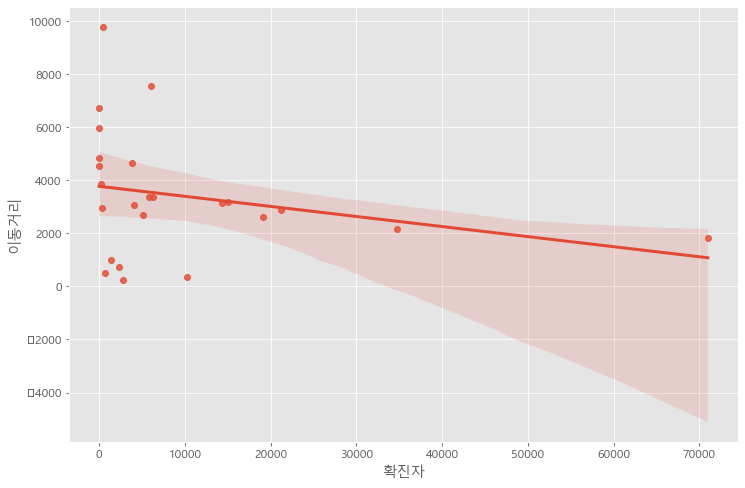

In [248]:
sns.regplot('확진자', '이동거리', data = COR)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


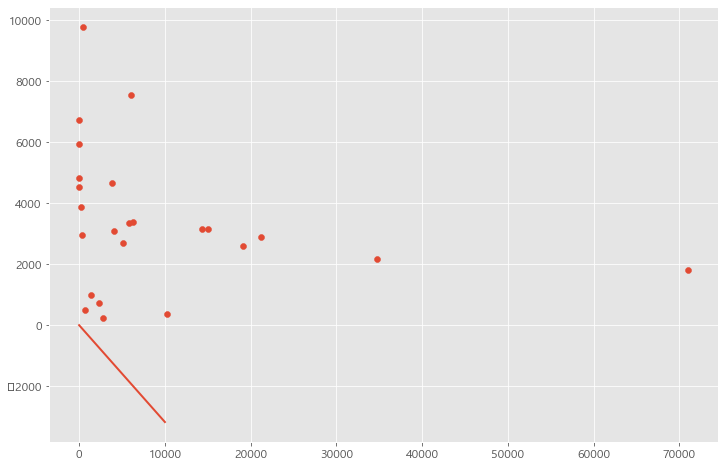

In [227]:
plt.scatter(D_DF[['확진자']], DATA['이동거리'])
plt.plot(Xfit,yfit)

# @@@@@ T분포별 pvalue 확인
- 이동거리~확진자 상관관계

In [63]:
from scipy import stats

In [73]:
stats.ttest_rel(DATA[4:],D_DF[4:])

Ttest_relResult(statistic=array([-2.15201373]), pvalue=array([0.0444653]))

In [75]:
stats.ttest_rel(DATA_1,D_DF_BF)

Ttest_relResult(statistic=array([1.28692662]), pvalue=array([0.22454184]))

In [58]:
stats.ttest_rel(DATA_2,D_DF_AF)

Ttest_relResult(statistic=array([-2.38652175]), pvalue=array([0.03608266]))

In [291]:
D_DF[4:]

,확진자
월,
2020-05,228
2020-06,451
2020-07,288
2020-08,2267
2020-09,1424
2020-10,719
2020-11,2802
2020-12,10209
2021-01,5168


In [289]:
stats.ttest_rel(D_DF[4:],B_DF_AF[4:]/100)

Ttest_relResult(statistic=array([-3.39266959]), pvalue=array([0.00305469]))

In [290]:
B_DF_AF[4:]

,대여건수
월,
2020-05,2480330
2020-06,2770858
2020-07,2582511
2020-08,1733973
2020-09,2811990
2020-10,2891618
2020-11,1990070
2020-12,1196309
2021-01,812021


# 공분산

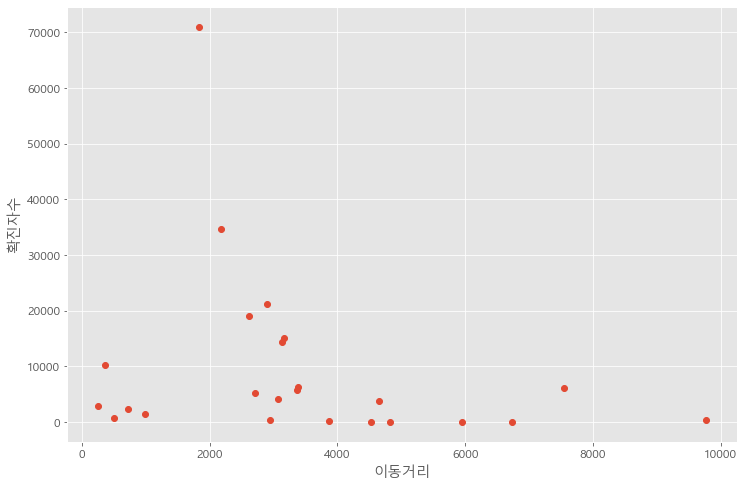

In [27]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2

plt.plot(DATA, D_DF, 'o')

plt.xlabel('이동거리')
plt.ylabel('확진자수')
plt.show()

In [42]:
np.cov(DATA['이동거리'], D_DF['확진자']) # 공분산 = -9.34812626e+06  (음의 방향으로 변화)

array([[ 5.52442818e+06, -9.34812626e+06],
       [-9.34812626e+06,  2.46386095e+08]])

In [47]:
np.corrcoef(DATA['이동거리'], D_DF['확진자']) # -0.25338028 음의 상관관계

array([[ 1.        , -0.25338028],
       [-0.25338028,  1.        ]])

In [51]:
x = D_DF['확진자']
y = DATA['이동거리']
cov = np.cov(x, y)
xsd = np.std(x, ddof = 1)
ysd = np.std(y, ddof = 1)

cov / (xsd * ysd) # -0.25338028 음의상관관계 직접계산 / 비선형적이면 측정 불가

array([[ 6.67827704, -0.25338028],
       [-0.25338028,  0.14973922]])

# 스피어만

In [52]:
import scipy.stats

In [57]:
scipy.stats.spearmanr(x,y)

SpearmanrResult(correlation=-0.41427343801190747, pvalue=0.04415242755367268)

# kendall tau

In [58]:
scipy.stats.kendalltau(x,y)

KendalltauResult(correlation=-0.3023724562500155, pvalue=0.03929430019325364)

# 피어슨, p값

In [56]:
scipy.stats.pearsonr(x, y)

(-0.2533802767647832, 0.2322211629277606)

# 공분산성이 없는 조합

In [43]:
z = [-3, -2, -1, 0, 1, 2, 3]
w = [9, 4, 1, 0, 1, 4, 9]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


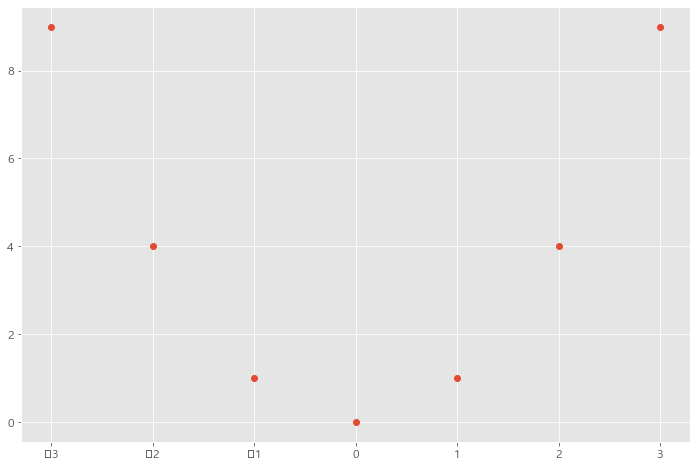

In [44]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2

plt.plot(z, w, 'o')
plt.show()

In [45]:
np.cov(z, w) # 확실히 관계성이 있지만 공분산이 0이므로 선형관계는 없음 (공분산은 선형관계만 설명 가능)

array([[ 4.66666667,  0.        ],
       [ 0.        , 14.        ]])

# Ttest 검증
- 대응표본

In [61]:
tt = DATA_1.append((DATA_2*10))
tt

,이동거리
월,
2020-01,4523.796668
2020-02,4825.902353
2020-03,6733.142302
2020-04,5952.447186
2020-05,3870.881290
2020-06,9780.351784
2020-07,2944.518821
2020-08,725.609916
2020-09,983.861150


In [71]:
stats.ttest_rel(tt,D_DF)

Ttest_relResult(statistic=array([2.04275535]), pvalue=array([0.05270105]))

In [87]:
stats.ttest_rel(DATA[4:],D_DF[4:]) # 대응표본 A, B의 차이를 구함, 
# 가설 :모집단 차이의 평균 0 -> 표본 차이의 평균도 0

Ttest_relResult(statistic=array([-2.15201373]), pvalue=array([0.0444653]))

In [79]:
np.mean(DATA[4:])

이동거리    2995.667195
dtype: float64

In [73]:
np.mean(D_DF[4:])

확진자    11249.3
dtype: float64

- 독립표본

In [86]:
m = scipy.stats.ttest_ind(DATA[3:], D_DF[3:], equal_var=False)
# ttest_ind 두 집단의 평균차이가 유의미한지 t검증 (독립표본, 서로 크기 달라도 상관없음)
# 독립표본 A, B의 모평균은 동일하며, 그 가설이 맞다면 유의수준이 0.05를 넘지 않아야 함
m

Ttest_indResult(statistic=array([-2.09839796]), pvalue=array([0.0482474]))

In [82]:
t = m.statistic
df = len(DATA[4:]) + len(D_DF[4:]) - 2 # 자유도
abs(t) / np.sqrt(df)                    # 효과크기는 중간수준 (0.2 낮음/ 0.5 중간 / 0.8 큰편)

array([0.35690021])

In [83]:
t2 = t ** 2
np.sqrt(t2 / (t2 + df))

array([0.33613371])